In [2]:

import pandas as pd
import numpy as np

import os
import matplotlib.pyplot as plt
import seaborn as sns

import scipy
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:

# Create a path to main folder
path = r'C:\Users\reece\InstaCart Basket Analysis 4.4.23'

# Import dataset
df = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data','orders_products_merged_aggregated.pkl'))
file_path = r'C:\Users\reece\InstaCart Basket Analysis 4.4.23\Data\Prepared Data\wrangled_cust_merged.pkl'
file = r'C:\Users\reece\InstaCart Basket Analysis 4.4.23\Data\Prepared Data\orders_products_final.pkl'
customer = pd.read_pickle(file_path)
final_df = pd.read_pickle(file)

Renaming Columns


In [4]:
final_df.head()

,Product_Name,Prices,user_id,days_since_prior_order,busiest_period_of_day,max_order,loyalty_flag,spending_flag,order_freq_flag,Gender,...,Age,date_joined,n_dependants,fam_status,income,department_id,region,age_profile,income_profile,child_profile
32,Chocolate Sandwich Cookies,5.8,2850,9.0,Most orders,23,Regular customer,Low spender,Frequent customer,Male,...,22,7/5/2019,1,married,46105,19.0,West,Young,Mid-income,Parent
33,Chocolate Sandwich Cookies,5.8,2850,9.0,Most orders,23,Regular customer,Low spender,Frequent customer,Male,...,22,7/5/2019,1,married,46105,12.0,West,Young,Mid-income,Parent
34,Chocolate Sandwich Cookies,5.8,2857,10.0,Average orders,25,Regular customer,Low spender,Regular customer,Female,...,30,9/23/2017,2,married,91407,7.0,South,Middle-aged,Mid-income,Parent
37,Chocolate Sandwich Cookies,5.8,4006,7.0,Most orders,42,Loyal customer,Low spender,Frequent customer,Male,...,28,5/26/2017,0,single,96906,16.0,South,Middle-aged,Mid-income,Single Adult
38,Chocolate Sandwich Cookies,5.8,4006,7.0,Most orders,42,Loyal customer,Low spender,Frequent customer,Male,...,28,5/26/2017,0,single,96906,13.0,South,Middle-aged,Mid-income,Single Adult


In [5]:
customer = customer.rename(columns={"STATE": "state"})


In [6]:
customer = customer.rename(columns={"Age": "age"})

In [7]:
customer = customer.rename(columns={'n_dependants': '#_of_dependents'})

In [8]:
customer = customer.rename(columns={'loyalty_flag': 'type_of_customer'})

In [9]:


customer = customer.rename(columns={'spending_flag': 'type_of_spender'})

In [10]:
customer = customer.rename(columns={'order_freq_flag': 'type_of_frequency'})

In [11]:
customer = customer.rename(columns={'Gender': 'gender'})

In [12]:





customer = customer.rename(columns={'Prices': 'prices'})

In [13]:
customer = customer.rename(columns={'Product_Name': 'product_name'})

In [14]:
customer.head()

,product_name,prices,user_id,days_since_prior_order,busiest_period_of_day,max_order,type_of_customer,type_of_spender,type_of_frequency,gender,state,age,date_joined,#_of_dependents,fam_status,income
0,Chocolate Sandwich Cookies,5.8,138,3.0,Most orders,32,Regular customer,Low spender,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
1,Chocolate Sandwich Cookies,5.8,138,20.0,Average orders,32,Regular customer,Low spender,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
2,Chocolate Sandwich Cookies,5.8,709,6.0,Average orders,5,New customer,Low spender,Frequent customer,Female,Vermont,66,6/16/2018,2,married,158302
3,Chocolate Sandwich Cookies,5.8,764,9.0,Average orders,3,New customer,Low spender,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308
4,Chocolate Sandwich Cookies,5.8,777,26.0,Average orders,26,Regular customer,Low spender,Regular customer,Female,Hawaii,51,1/4/2019,2,married,57797


Changing the number that correlated to day of week to actual text day of week in column orders_day_of_week

In [15]:


df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,add_to_cart_order,reordered,_merge,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_freq,order_freq_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,5,0,both,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,1,1,both,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,20,0,both,Average orders,5,New customer,7.930208,Low spender,8.0,Frequent customer
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,10,0,both,Most orders,3,New customer,4.972414,Low spender,9.0,Frequent customer
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,11,1,both,Average orders,3,New customer,4.972414,Low spender,9.0,Frequent customer


In [16]:
# create a dictionary that maps the numbers to the corresponding days
days_map = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}

# apply the map function to the orders_day_of_week column
df['orders_day_of_week'] = df['orders_day_of_week'].map(days_map)


In [17]:
df.head(25)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,add_to_cart_order,reordered,_merge,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_freq,order_freq_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,Saturday,11,...,5,0,both,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,Saturday,17,...,1,1,both,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,NaN,21,...,20,0,both,Average orders,5,New customer,7.930208,Low spender,8.0,Frequent customer
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,Wednesday,13,...,10,0,both,Most orders,3,New customer,4.972414,Low spender,9.0,Frequent customer
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,Thursday,17,...,11,1,both,Average orders,3,New customer,4.972414,Low spender,9.0,Frequent customer
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,Monday,7,...,7,0,both,Average orders,26,Regular customer,6.935398,Low spender,11.0,Regular customer
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,Tuesday,14,...,2,0,both,Most orders,9,New customer,5.957576,Low spender,20.0,Regular customer
7,1,Chocolate Sandwich Cookies,61,19,5.8,1290456,910,12,Wednesday,10,...,1,0,both,Most orders,12,Regular customer,6.680000,Low spender,6.0,Frequent customer
8,1,Chocolate Sandwich Cookies,61,19,5.8,369558,1052,10,Monday,20,...,1,0,both,Average orders,20,Regular customer,7.162500,Low spender,10.0,Frequent customer
9,1,Chocolate Sandwich Cookies,61,19,5.8,589712,1052,15,Monday,12,...,2,1,both,Most orders,20,Regular customer,7.162500,Low spender,10.0,Frequent customer


In [18]:
df.dropna(subset=['orders_day_of_week'], inplace=True)


In [19]:
# Finding NaN values in  Orders_day_of_Week-
df[df['orders_day_of_week'].isnull()]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,add_to_cart_order,reordered,_merge,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_freq,order_freq_flag


In [20]:
# create a dictionary to map days of the week to numbers
day_map = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}

# apply the mapping to the orders_day_of_week column
df['orders_day_of_week_num'] = df['orders_day_of_week'].map(day_map)

# count the values in the orders_day_of_week_num column
counts = df['orders_day_of_week_num'].value_counts()


In [21]:




#Key Question 1 	The sales team needs to know what the busiest days of the week and hours of the day are
#(i.e., the days and times with the most orders) in order to schedule ads at times when there are fewer orders.


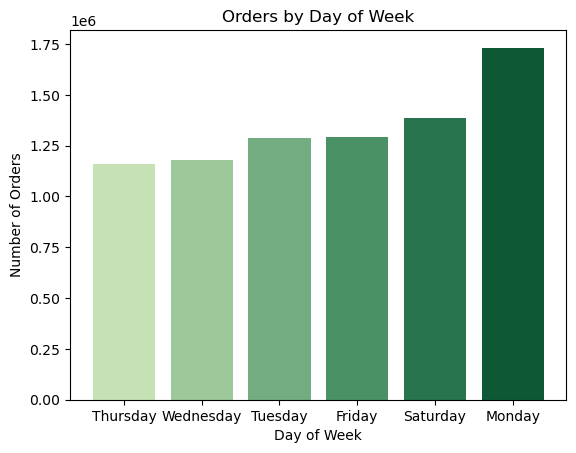

<Figure size 640x480 with 0 Axes>

In [22]:
# Reverse the order of the value counts series
counts = df['orders_day_of_week'].value_counts()[::-1]

# Define a list of green shades to use for the bars
colors = ['#c6e2b4', '#9cc89a', '#73ac80', '#4a9166', '#28744f', '#0f5836', '#00441b']

# Generate the bar chart
plt.bar(counts.index, counts.values, color=colors)
plt.title('Orders by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.show()
plt.savefig(os.path.join(path, 'orders_by_day_of_week.png'))



Key Question 2 	They also want to know whether there are particular times of the day when people spend the most money, as this might inform the type of products they advertise at these times.


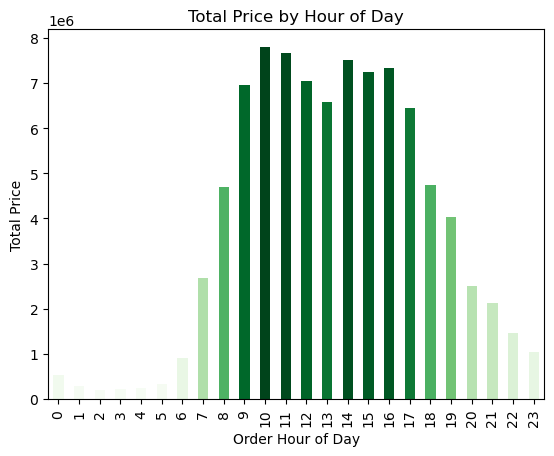

In [23]:
# group the data by order_hour_of_day and compute the sum of prices for each hour
grouped = df.groupby('order_hour_of_day')['prices'].sum()

# create a custom color map that ranges from light green to dark green based on the values of the data
norm = plt.Normalize(grouped.min(), grouped.max())
colors = plt.cm.Greens(norm(grouped))

# plot the data as a bar chart with a custom color map
grouped.plot(kind='bar', color=colors)

# set the labels for the x and y axes and the chart title
plt.xlabel('Order Hour of Day')
plt.ylabel('Total Price')
plt.title('Total Price by Hour of Day')

# display the plot
plt.savefig(os.path.join(path, 'total_price_by_hour_of_day.png'))
plt.show()

Key Question 3	Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.


In [22]:
# Task 5. Creating customer profiles
#Price Flag
price_profile= []
for row in df['prices'].tolist():
    if row <= 5:
        price_profile.append('low_range_priced_product')
    elif row > 5 and row <=15:
        price_profile.append('middle_range_priced_product')
    elif row > 15:
        price_profile.append('high_range_priced_product')
    else:
        print('Weird value:', row)

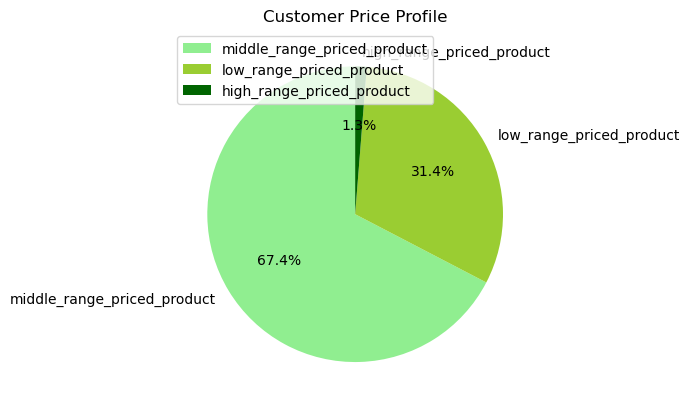

<Figure size 640x480 with 0 Axes>

In [23]:
# count the occurrences of each category in the price_profile list
price_counts = pd.Series(price_profile).value_counts()

# create a pie chart from the price_counts series
ax = price_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, 
                       colors=['lightgreen', 'yellowgreen', 'darkgreen'])

# set the title and legend
ax.set_title('Customer Price Profile')
ax.legend(loc='upper left')

# display the plot
plt.show()
plt.savefig(os.path.join(path, 'customer_price_profile.png'))

In [24]:
Key Question 4	Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.


SyntaxError: invalid syntax (2361694060.py, line 1)

In [25]:
num_unique_depts = df['department_id'].nunique()
print('Number of unique departments:', num_unique_depts)


Number of unique departments: 21


In [26]:
# group the orders by department and count the number of orders for each department
dept_order_counts = df.groupby('department_id')['order_id'].size()

# sort the departments by order count in descending order
dept_order_counts = dept_order_counts.sort_values(ascending=False)

# print the department with the most orders
print("The department with the most orders is:", dept_order_counts.index[0])


The department with the most orders is: 4


C:\Users\reece\AppData\Local\Temp\ipykernel_23084\617083289.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('Greens_r', 20)


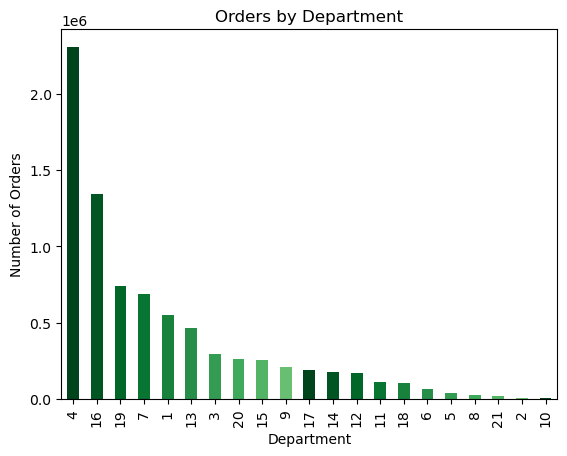

<Figure size 640x480 with 0 Axes>

In [27]:
import matplotlib.cm as cm
# count the number of orders for each department
orders_by_dept = df['department_id'].value_counts()

# create a colormap with 10 different shades of green
colors = cm.get_cmap('Greens_r', 20)

# plot the bar chart
ax = orders_by_dept.plot(kind='bar', color=colors(range(10)))

# set the labels for the x-axis and y-axis
ax.set_xlabel('Department')
ax.set_ylabel('Number of Orders')

# set the title of the chart
ax.set_title('Orders by Department')

# display the plot
plt.show()
plt.savefig(os.path.join(path, 'orders_by_department.png'))


Key Question 5	What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?


In [28]:
# create a dictionary that maps department_id values to their respective names
dept_names = {1: 'other', 2: 'bakery', 3: 'produce', 4: 'alcohol', 5: 'international',
              6: 'beverages', 7: 'pets', 8: 'dry goods pasta', 9: 'bulk', 10: 'personal care',
              11: 'meat seafood', 12: 'pantry', 13: 'breakfast', 14: 'canned goods',
              15: 'dairy eggs', 16: 'household', 17: 'babies', 18: 'snacks', 19: 'deli', 20: 'missing'}



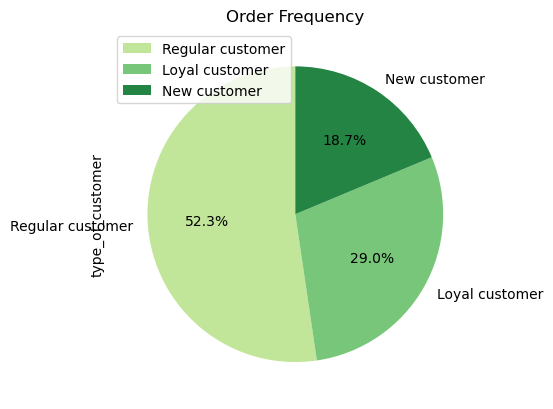

In [29]:

# count the occurrences of each category in the order_freq_flag column
freq_counts = customer['type_of_customer'].value_counts()

# create a colormap with 3 different shades of green
colors = ['#c2e699', '#78c679', '#238443']

# create a pie chart from the freq_counts series
ax = freq_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, 
                       colors=colors)

# set the title and legend
ax.set_title('Order Frequency')
ax.legend(loc='upper left')
plt.savefig(os.path.join(path, 'order_frequency.png'))
# display the plot
plt.show()



Key Question 6	Are there differences in ordering habits based on a customer’s loyalty status?


In [30]:
customer.head()

,product_name,prices,user_id,days_since_prior_order,busiest_period_of_day,max_order,type_of_customer,type_of_spender,type_of_frequency,gender,state,age,date_joined,#_of_dependents,fam_status,income
0,Chocolate Sandwich Cookies,5.8,138,3.0,Most orders,32,Regular customer,Low spender,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
1,Chocolate Sandwich Cookies,5.8,138,20.0,Average orders,32,Regular customer,Low spender,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
2,Chocolate Sandwich Cookies,5.8,709,6.0,Average orders,5,New customer,Low spender,Frequent customer,Female,Vermont,66,6/16/2018,2,married,158302
3,Chocolate Sandwich Cookies,5.8,764,9.0,Average orders,3,New customer,Low spender,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308
4,Chocolate Sandwich Cookies,5.8,777,26.0,Average orders,26,Regular customer,Low spender,Regular customer,Female,Hawaii,51,1/4/2019,2,married,57797


In [31]:

final_df.head()

,Product_Name,Prices,user_id,days_since_prior_order,busiest_period_of_day,max_order,loyalty_flag,spending_flag,order_freq_flag,Gender,...,Age,date_joined,n_dependants,fam_status,income,department_id,region,age_profile,income_profile,child_profile
32,Chocolate Sandwich Cookies,5.8,2850,9.0,Most orders,23,Regular customer,Low spender,Frequent customer,Male,...,22,7/5/2019,1,married,46105,19.0,West,Young,Mid-income,Parent
33,Chocolate Sandwich Cookies,5.8,2850,9.0,Most orders,23,Regular customer,Low spender,Frequent customer,Male,...,22,7/5/2019,1,married,46105,12.0,West,Young,Mid-income,Parent
34,Chocolate Sandwich Cookies,5.8,2857,10.0,Average orders,25,Regular customer,Low spender,Regular customer,Female,...,30,9/23/2017,2,married,91407,7.0,South,Middle-aged,Mid-income,Parent
37,Chocolate Sandwich Cookies,5.8,4006,7.0,Most orders,42,Loyal customer,Low spender,Frequent customer,Male,...,28,5/26/2017,0,single,96906,16.0,South,Middle-aged,Mid-income,Single Adult
38,Chocolate Sandwich Cookies,5.8,4006,7.0,Most orders,42,Loyal customer,Low spender,Frequent customer,Male,...,28,5/26/2017,0,single,96906,13.0,South,Middle-aged,Mid-income,Single Adult


In [32]:
final_df['spending_flag'].value_counts()



Low spender     6339819
High spender     117563
Name: spending_flag, dtype: int64

In [33]:
customer['type_of_customer'].value_counts()


Regular customer    4187371
Loyal customer      2318169
New customer        1496776
Name: type_of_customer, dtype: int64

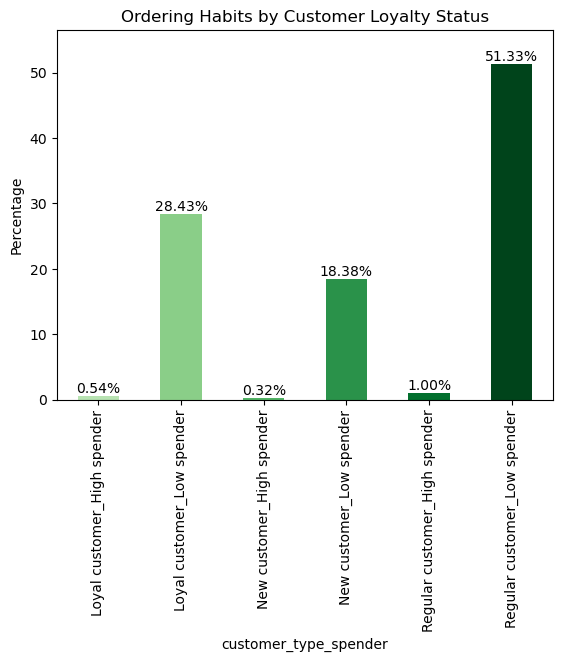

In [34]:
# create the customer_type_spender column
customer['customer_type_spender'] = customer['type_of_customer'] + '_' + customer['type_of_spender']

# group the data by customer_type_spender and count the occurrences
grouped = customer.groupby('customer_type_spender').size()

# calculate the percentages
percentages = grouped / grouped.sum() * 100

# create a color map with shades of green
colors = plt.cm.Greens(np.linspace(0.3, 1, len(percentages)))

# create a bar chart to visualize the percentages
fig, ax = plt.subplots()
percentages.plot(kind='bar', color=colors)
ax.set_ylabel('Percentage')
ax.set_title('Ordering Habits by Customer Loyalty Status')

# adjust the y-axis range to emphasize the differences in values
ax.set_ylim([0, max(percentages)*1.1])

# add value labels to the bars
for i, val in enumerate(percentages):
    plt.text(i, val + 0.5, f'{val:.2f}%', ha='center')
plt.savefig(os.path.join(path, 'order_habits_by_customer_loyalty_status.png'))
plt.show()

Key Question 7	Are there differences in ordering habits based on a customer’s region?


In [23]:
#region 1 Northeast ME, NH, VT, MA, RI, CT

customer.loc[customer['state'].isin(['Maine', 'New Hampshire', 'Vermont', 'Delaware', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New Jersey', 'New York', 'Pennsylvania']), 'region'] = 'North'
    
#region 2 Midwest Wisconsin, Michigan, Illinois, Indiana, Ohio, north dakoa, south dakoa, nebraska, kansas, Minnesota, Iowa, Missouri

customer.loc[customer['state'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio','North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']), 'region'] = 'Midwest'

#region 3 South  Delaware, Maryland, District of Columbia, Virginia, West Virginia, North Carolina, South Carolina, Georgia, Florida, Kentucky, Tennessee, Mississippi, Alabama

customer.loc[customer['state'].isin(['Delaware', 'Texas', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Louisiana', 'Arkansas', 'Alabama']), 'region'] = 'South'

#region 4 West Idaho, Montana, Wyoming, Nevada, Utah, Colorado, Arizona, New Mexico

customer.loc[customer['state'].isin(['Idaho','Oklahoma',  'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']), 'region'] = 'West'
                                  



In [24]:
# Regional income differences
regional_income_crosstab = pd.crosstab(final_df['region'], final_df['income_profile'], dropna = False)
# create a colormap


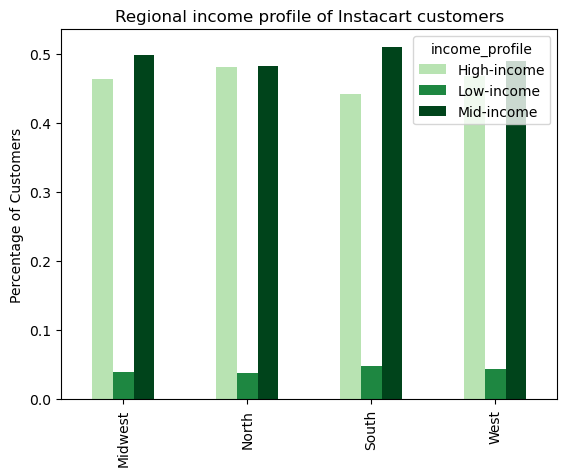

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap



# Define a custom color map using the same colors as the previous chart
colors = ['lightgreen', 'mediumseagreen', 'seagreen', 'darkgreen']
cmap = mcolors.ListedColormap(colors)


# Create a cross-tabulation of regional and income profile
regional_income_crosstab = pd.crosstab(final_df['region'], final_df['income_profile'], normalize='index')

# create a color map with shades of green
colors = plt.cm.Greens(np.linspace(0.3, 1, len(colors)))
# Define the colormap with shades of green
cmap = ListedColormap(colors)

# Create a bar chart with the modified colormap
regional_income_bar = regional_income_crosstab.plot(kind='bar', stacked=False, title='Regional income profile of Instacart customers', cmap=cmap, xlabel='')
regional_income_bar.set_ylabel('Percentage of Customers')

# Save the plot to a file
plt.savefig('regional_income_profile.png')



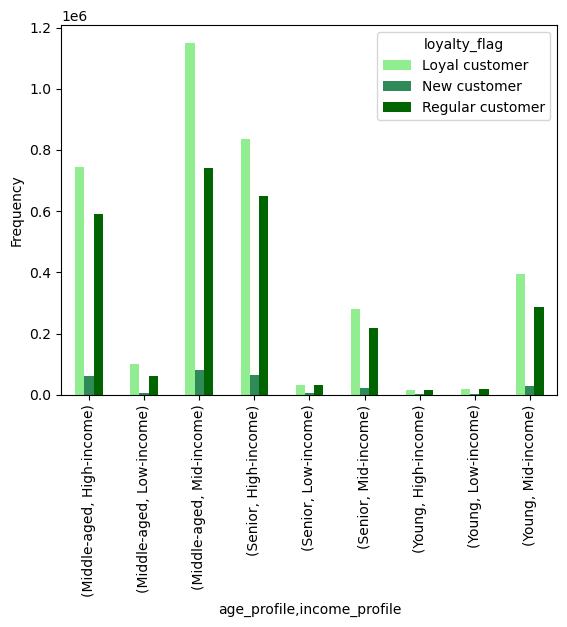

In [65]:
# Define a custom color map using the same colors as the previous chart
colors = ['lightgreen', 'mediumseagreen', 'seagreen', 'darkgreen']
cmap = mcolors.ListedColormap(colors)

# Create the crosstab with the loyalty_flag column
crosstab_df = pd.crosstab([final_df['age_profile'], final_df['income_profile']], final_df['loyalty_flag'])

# Plot the crosstab as a bar chart with the custom color map
ax = crosstab_df.plot.bar(cmap=cmap)

# Add a label to the y-axis
ax.set_ylabel('Frequency')

plt.show()


Key Question 8	Is there a connection between age and family status in terms of ordering habits?


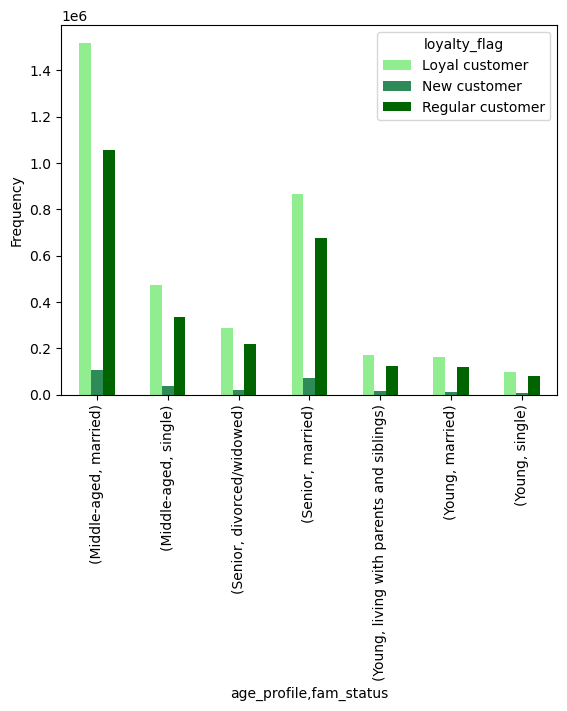

<Figure size 640x480 with 0 Axes>

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors



# Define a custom color map using the same colors as the previous chart
colors = ['lightgreen', 'mediumseagreen', 'seagreen', 'darkgreen']
cmap = mcolors.ListedColormap(colors)

# Create the crosstab with the loyalty_flag column
crosstab_df = pd.crosstab([final_df['age_profile'], final_df['fam_status']], final_df['loyalty_flag'])

# Plot the crosstab as a bar chart with the custom color map
ax = crosstab_df.plot.bar(cmap=cmap)

# Add a label to the y-axis
ax.set_ylabel('Frequency')

plt.show()
plt.savefig(os.path.join(path, 'reigonal_comparison_familystatus_income_loyalty.png'))

Key Question 9	What different classifications does the demographic information suggest? Age? Income? Certain types of goods? Family status?


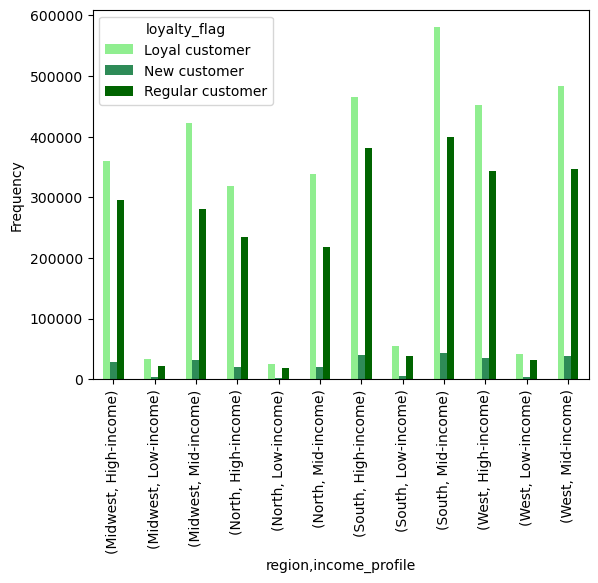

In [58]:

# Define a custom color map using the same colors as the previous chart
colors = ['lightgreen', 'mediumseagreen', 'seagreen', 'darkgreen']
cmap = mcolors.ListedColormap(colors)

# Create the crosstab with the loyalty_flag column
crosstab_df = pd.crosstab([final_df['region'], final_df['income_profile']], final_df['loyalty_flag'])

# Plot the crosstab as a bar chart with the custom color map
ax = crosstab_df.plot.bar(cmap=cmap)

# Add a label to the y-axis
ax.set_ylabel('Frequency')

plt.show()
plt.savefig(os.path.join(path, 'regional_income_profile_of_instacart_customers.png'))


In [55]:
final_df.head()

,Product_Name,Prices,user_id,days_since_prior_order,busiest_period_of_day,max_order,loyalty_flag,spending_flag,order_freq_flag,Gender,...,Age,date_joined,n_dependants,fam_status,income,department_id,region,age_profile,income_profile,child_profile
32,Chocolate Sandwich Cookies,5.8,2850,9.0,Most orders,23,Regular customer,Low spender,Frequent customer,Male,...,22,7/5/2019,1,married,46105,19.0,West,Young,Mid-income,Parent
33,Chocolate Sandwich Cookies,5.8,2850,9.0,Most orders,23,Regular customer,Low spender,Frequent customer,Male,...,22,7/5/2019,1,married,46105,12.0,West,Young,Mid-income,Parent
34,Chocolate Sandwich Cookies,5.8,2857,10.0,Average orders,25,Regular customer,Low spender,Regular customer,Female,...,30,9/23/2017,2,married,91407,7.0,South,Middle-aged,Mid-income,Parent
37,Chocolate Sandwich Cookies,5.8,4006,7.0,Most orders,42,Loyal customer,Low spender,Frequent customer,Male,...,28,5/26/2017,0,single,96906,16.0,South,Middle-aged,Mid-income,Single Adult
38,Chocolate Sandwich Cookies,5.8,4006,7.0,Most orders,42,Loyal customer,Low spender,Frequent customer,Male,...,28,5/26/2017,0,single,96906,13.0,South,Middle-aged,Mid-income,Single Adult


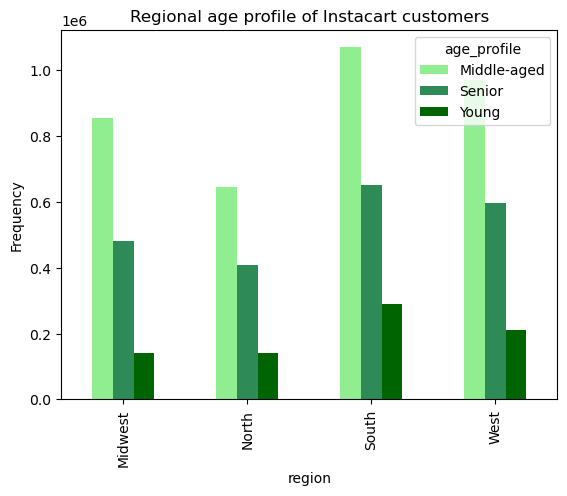

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define a custom color map using the same colors as the previous chart
colors = ['lightgreen', 'mediumseagreen', 'seagreen', 'darkgreen']
cmap = mcolors.ListedColormap(colors)

# Create a crosstabulation of regional and age profile
regional_age_crosstab = pd.crosstab(final_df['region'], final_df['age_profile'], dropna=False)

# Create a bar chart with the first colormap
regional_age_crosstab.plot(kind='bar', stacked=False, title='Regional age profile of Instacart customers', cmap=cmap, xlabel='')
plt.xticks(rotation=0)




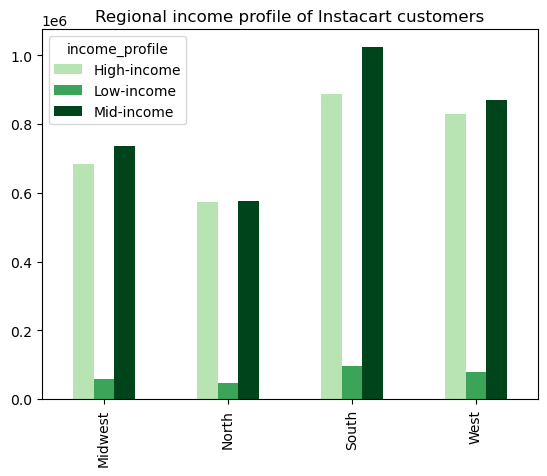

In [48]:
# Regional income differences
regional_income_crosstab = pd.crosstab(final_df['region'], final_df['income_profile'], dropna = False)
regional_income_bar = regional_income_crosstab.plot(kind = 'bar', stacked = False, title = 'Regional income profile of Instacart customers', cmap = cmap, xlabel = '')
plt.savefig(os.path.join(path, 'regional_income_profile_of_instacart_customers.png'))

Key Question 10	What differences can you find in ordering habits of different customer profiles? Consider the price of orders, the frequency of orders, the products customers are ordering, and anything else you can think of


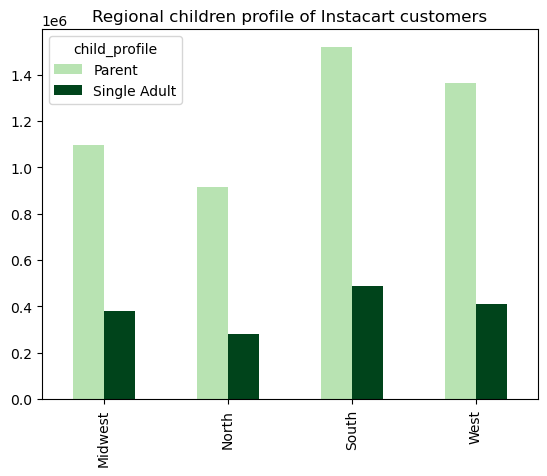

In [ ]:
# Regional family status differences
regional_children_crosstab = pd.crosstab(final_df['region'], final_df['child_profile'], dropna = False)
regional_children_bar = regional_children_crosstab.plot(kind = 'bar', stacked = False, title = 'Regional children profile of Instacart customers', cmap = cmap, xlabel = '')
plt.savefig(os.path.join(path, 'regional_children_profile_of_instacart_customers.png'))

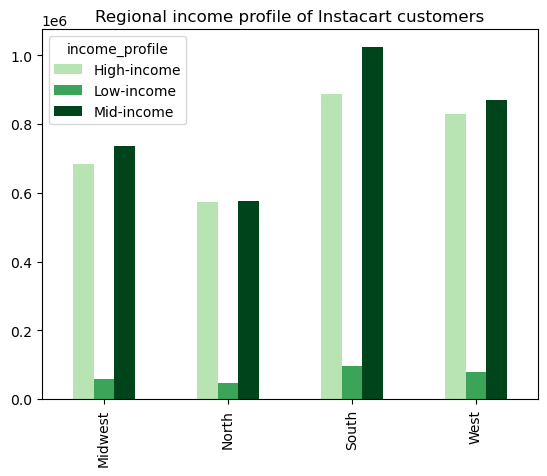

In [52]:
# Regional income differences
regional_income_crosstab = pd.crosstab(final_df['region'], final_df['income_profile'], dropna = False)
regional_income_bar = regional_income_crosstab.plot(kind = 'bar', stacked = False, title = 'Regional income profile of Instacart customers', cmap = cmap, xlabel = '')
plt.savefig(os.path.join(path, 'regional_income_profile_of_instacart_customers.png'))

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'North'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

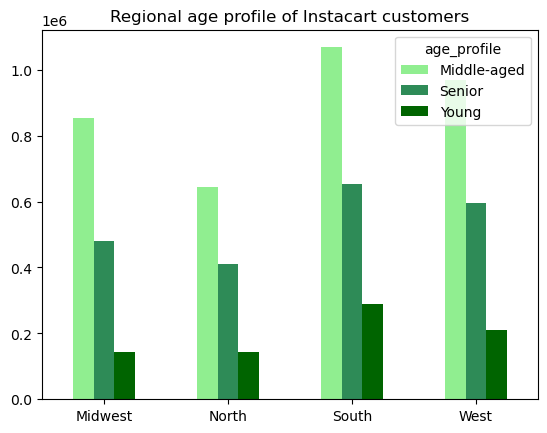

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define a custom color map using the same colors as the previous chart
colors = ['lightgreen', 'mediumseagreen', 'seagreen', 'darkgreen']
cmap = mcolors.ListedColormap(colors)

# Create a crosstabulation of regional and age profile
regional_age_crosstab = pd.crosstab(final_df['region'], final_df['age_profile'], dropna=False)

# Create a bar chart with the first colormap
regional_age_crosstab.plot(kind='bar', stacked=False, title='Regional age profile of Instacart customers', cmap=cmap, xlabel='')
plt.xticks(rotation=0)



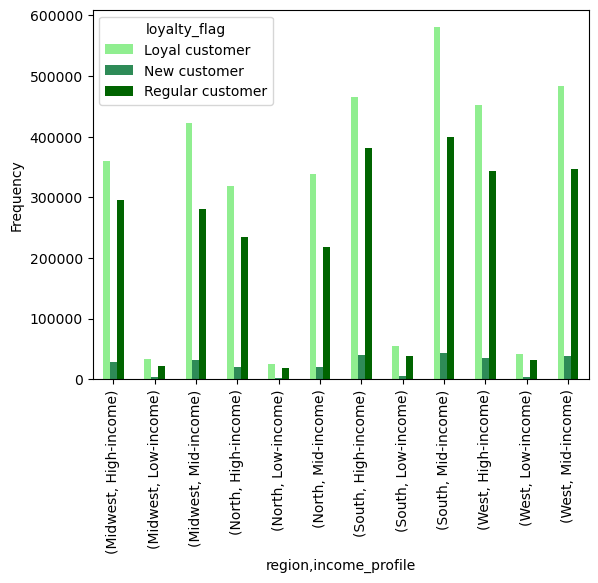

<Figure size 640x480 with 0 Axes>

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
# Define a custom color map using the same colors as the previous chart
colors = ['lightgreen', 'mediumseagreen', 'seagreen', 'darkgreen']
cmap = mcolors.ListedColormap(colors)

# Create the crosstab with the loyalty_flag column
crosstab_df = pd.crosstab([final_df['region'], final_df['income_profile']], final_df['loyalty_flag'])

# Plot the crosstab as a bar chart with the custom color map
ax = crosstab_df.plot.bar(cmap=cmap)

# Add a label to the y-axis
ax.set_ylabel('Frequency')

plt.show()
plt.savefig(os.path.join(path, 'regional_comparison_of_income_profile_and_spending_and_loyalty.png'))
